![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

Checking Data

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [16]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [17]:
insurance.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [18]:
insurance.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [19]:
insurance["sex"].value_counts()

male      517
female    503
man        64
M          64
woman      62
F          62
Name: sex, dtype: int64

In [20]:
insurance["smoker"].value_counts()

no     1013
yes     259
Name: smoker, dtype: int64

In [21]:
insurance["region"].value_counts()

Southeast    172
southeast    170
southwest    164
Northwest    161
Northeast    155
northeast    153
northwest    149
Southwest    148
Name: region, dtype: int64

In [22]:
insurance["charges"][:10]

0       16884.924
1       1725.5523
2       $4449.462
3    $21984.47061
4      $3866.8552
5      $3756.6216
6       8240.5896
7       7281.5056
8      $6406.4107
9     28923.13692
Name: charges, dtype: object

Processing Data

In [23]:
def process_data(df, validation=False):
    for col in df.columns:
        if df[col].dtype == "float64":
            df[col].fillna(df[col].median(), inplace = True)

    df['sex'] = df['sex'].replace({'M': 'male', 'man': 'male', 'F': 'female', 'woman': 'female'})
    df['region'] = df['region'].replace({'Northeast': 'Northwest','northwest': 'Northwest', 'northeast': 'Northwest', 'F': 'Northwest', 'Southeast': 'Southwest', 'southeast': 'Southwest','southwest': 'Southwest' })
    
    df['sex'] = df['sex'].replace({'female': 0, 'male': 1})
    df['region'] = df['region'].replace({'Southwest': 0, 'Northwest': 1})
    df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})
    
    if validation:
        df.dropna(subset=["sex", "smoker", "region"], inplace = True)
    else:
        df.dropna(subset="charges", inplace = True)
        df['charges'] = df['charges'].replace({'\$': ''}, regex=True)
        df['charges'] = df['charges'].astype(float)
        df.dropna(subset=["sex", "smoker", "region", "charges"], inplace = True)
    return df

In [24]:
insurance = process_data(insurance)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,0.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,0.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,0.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520


In [25]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking different models

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_scores = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gaussian Process": GaussianProcessRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

for model in models.values():
    model.fit(X_train, y_train)
    test_scores.append((model, model.score(X_test, y_test)))

test_scores

[(LinearRegression(), 0.6990214400156747),
 (Ridge(), 0.6988619593936147),
 (Lasso(alpha=0.1), 0.6990196016362971),
 (SVR(), -0.13827128032757163),
 (RandomForestRegressor(random_state=42), 0.8241667865946773),
 (GradientBoostingRegressor(random_state=42), 0.8439290412199556),
 (DecisionTreeRegressor(random_state=42), 0.7015914333322779),
 (KNeighborsRegressor(), 0.11230467292717572),
 (GaussianProcessRegressor(), -0.4435017970309716),
 (XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='(

Visualizing how our model get along

Text(0.5, 1.0, 'Porównanie wyników modeli regresji')

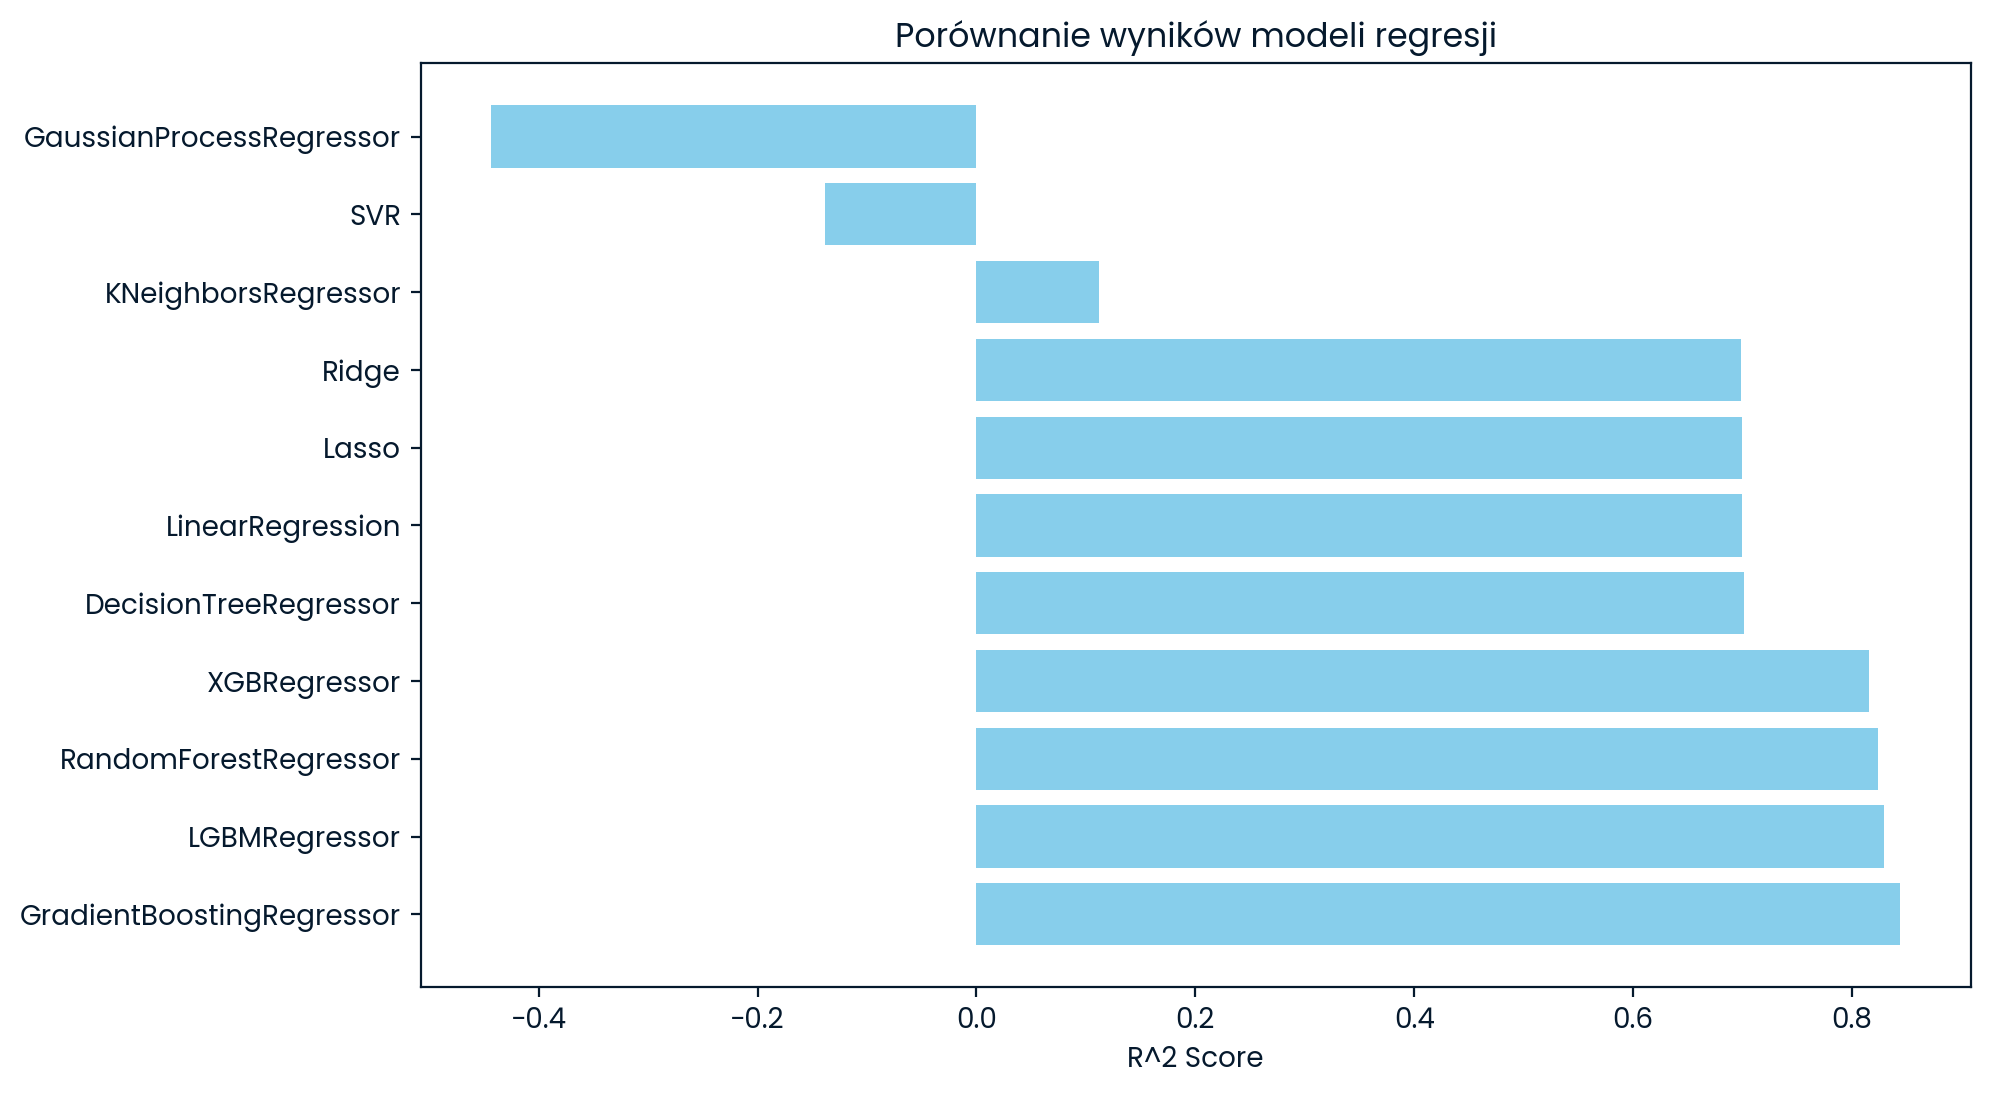

In [28]:
import matplotlib.pyplot as plt 

scores_sorted = sorted(test_scores, key=lambda x: x[1], reverse=True)

model_names = [str(model[0]).split("(")[0] for model in scores_sorted]  
model_scores = [score[1] for score in scores_sorted]

plt.figure(figsize=(10, 6))
plt.barh(model_names, model_scores, color='skyblue');
plt.xlabel('R^2 Score')
plt.title('Porównanie wyników modeli regresji')

Choosing the best model

In [120]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

Model Hypertuning

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [122]:
grid_search.best_score_

0.8583317890713149

Best model

In [30]:
model_final = GradientBoostingRegressor(n_estimators=100,
                                        random_state=42,
                                        learning_rate=0.05,
                                        max_depth=3,
                                        min_samples_leaf = 4,
                                        min_samples_split = 10)
model_final.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=4,
                          min_samples_split=10, random_state=42)

Evaluating model perfomance

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test) 
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_test, test_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE" : mean_squared_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

In [38]:
show_scores(model_final)

{'Training MAE': 2285.72407612887,
 'Valid MAE': 2824.119672582689,
 'Training MSE': 17056363.085690986,
 'Valid MSE': 22964790.612794,
 'Training R^2': 0.8818194203283322,
 'Valid R^2': 0.8536805842042667}

Checking our model on the new dataset

In [123]:
insurance_validation = pd.read_csv("validation_dataset.csv")
insurance_validation

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast
5,70.0,female,72.958351,11.0,yes,southeast
6,29.0,female,32.110000,2.0,no,northwest
7,42.0,female,41.325000,1.0,no,northeast
8,48.0,female,36.575000,0.0,no,northwest
9,63.0,male,33.660000,3.0,no,southeast


Processing new dataset

In [124]:
insurance_validation = process_data(insurance_validation, True)
insurance_validation

,age,sex,bmi,children,smoker,region
0,18.0,0,24.090000,1.0,0,0
1,39.0,1,26.410000,0.0,1,1
2,27.0,1,29.150000,0.0,1,0
3,71.0,1,65.502135,13.0,1,0
4,28.0,1,38.060000,0.0,0,0
5,70.0,0,72.958351,11.0,1,0
6,29.0,0,32.110000,2.0,0,1
7,42.0,0,41.325000,1.0,0,1
8,48.0,0,36.575000,0.0,0,1
9,63.0,1,33.660000,3.0,0,0


Creating column with predicted values

In [125]:
insurance_validation["predicted_charges"] = grid_search.predict(insurance_validation)

In [126]:
insurance_validation

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,0,24.090000,1.0,0,0,4424.342237
1,39.0,1,26.410000,0.0,1,1,20642.657498
2,27.0,1,29.150000,0.0,1,0,20890.061018
3,71.0,1,65.502135,13.0,1,0,49182.430395
4,28.0,1,38.060000,0.0,0,0,4412.835274
5,70.0,0,72.958351,11.0,1,0,49542.445059
6,29.0,0,32.110000,2.0,0,1,7550.449484
7,42.0,0,41.325000,1.0,0,1,7589.506052
8,48.0,0,36.575000,0.0,0,1,9436.512378
9,63.0,1,33.660000,3.0,0,0,15258.274065


Checking Feature Importance

In [39]:
model_final.feature_importances_

array([1.14823436e-01, 3.61832546e-04, 1.70739767e-01, 7.97629595e-03,
       7.03394227e-01, 2.70444185e-03])

Vizualizing Feature Importance

In [48]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "features_importances":importances})
        .sort_values("features_importances", ascending = False)
        .reset_index(drop=True))

    #Plot
    fig, ax = plt.subplots()
    ax.bar(df["features"][:n], df["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importances")
    ax.set_title("Features importances")

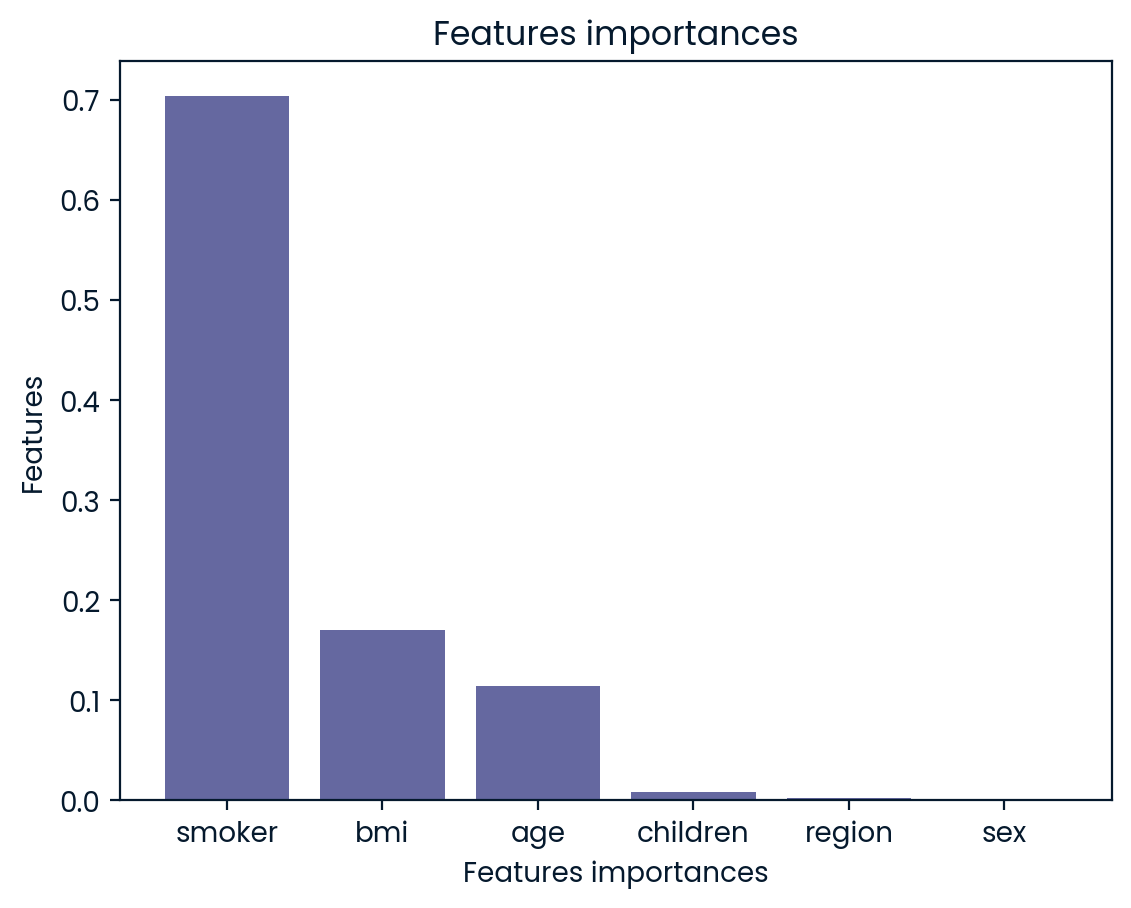

In [49]:
plot_features(X_train.columns,model_final.feature_importances_)